In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
import sklearn

In [44]:
wine=pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Basic EDA

In [8]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Univariate Analysis

In [10]:
col=wine.columns.values
col

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

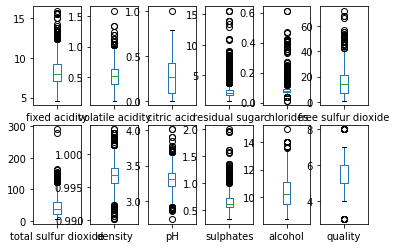

In [11]:
wine.plot(kind='box', subplots=True, layout=(2,6))

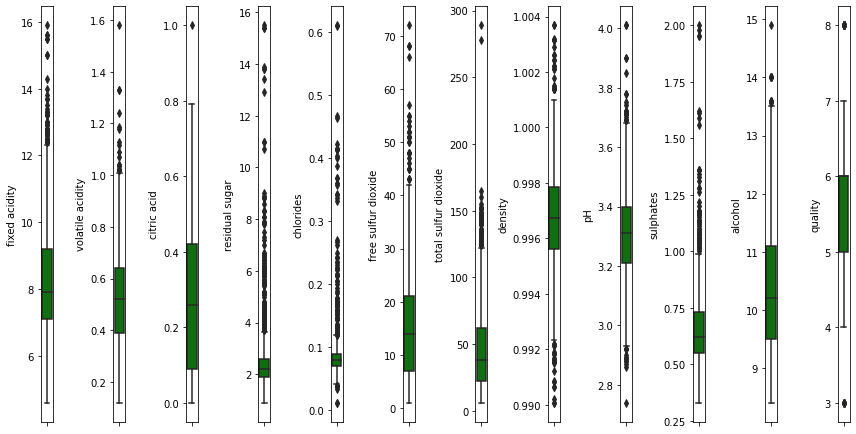

In [13]:
plt.figure(figsize=(12,48))
for i in range(len(col)):
    plt.subplot(8,12,i+1)
    sns.boxplot(wine[col[i]], orient='v', color='green')
    plt.tight_layout()

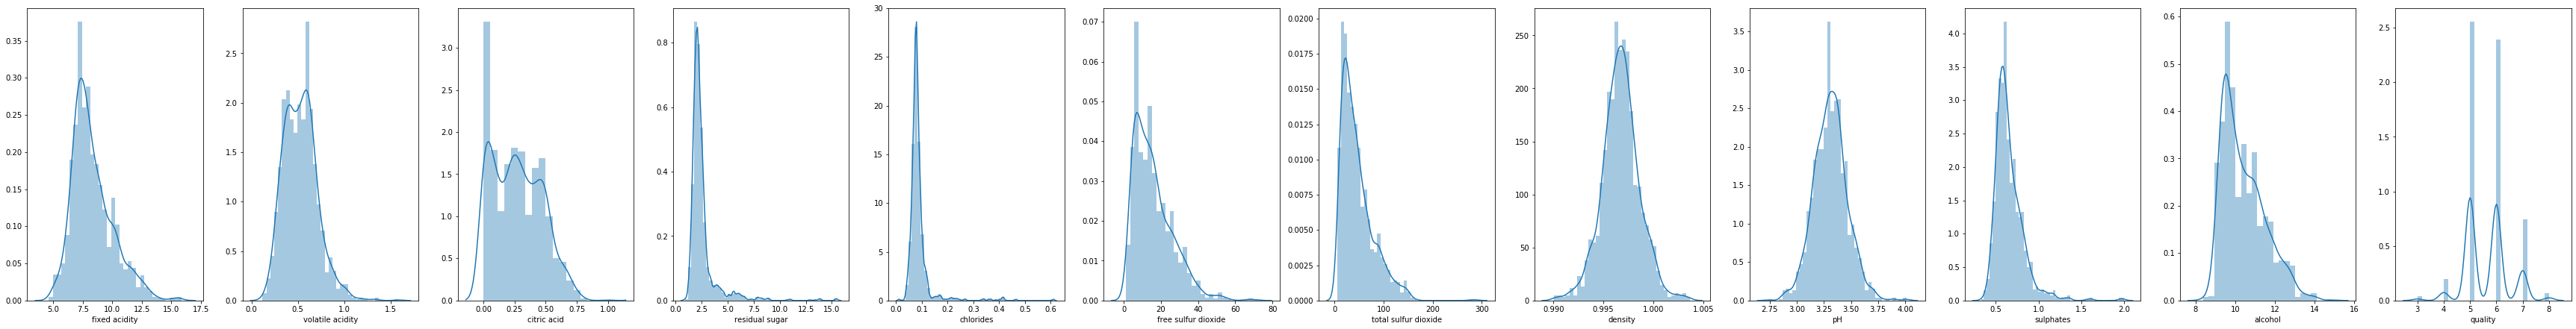

In [15]:
plt.figure(figsize=(48,48))
for i in range(len(col)):
    plt.subplot(8,12,i+1)
    sns.distplot(wine[col[i]])
    plt.tight_layout()

In [33]:
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [45]:
for i in range(len(col)-1):
    wine[col[i]]=np.log1p(wine[col[i]])

In [46]:
wine.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.087506
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.067142
pH                      0.048331
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [47]:
wine['residual sugar']=np.sqrt(wine['residual sugar'])
wine['chlorides']=np.sqrt(wine['chlorides'])
wine['alcohol']=np.sqrt(wine['alcohol'])
wine['sulphates']=np.sqrt(wine['sulphates'])

In [48]:
wine.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.087506
residual sugar          1.748459
chlorides               3.332369
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.067142
pH                      0.048331
sulphates               1.122806
alcohol                 0.642902
quality                 0.217802
dtype: float64

In [49]:
wine['residual sugar']=np.cbrt(wine['residual sugar'])
wine['chlorides']=np.cbrt(wine['chlorides'])
wine['alcohol']=np.cbrt(wine['alcohol'])
wine['sulphates']=np.cbrt(wine['sulphates'])

In [50]:
wine.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.087506
residual sugar          1.433026
chlorides               2.157831
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.067142
pH                      0.048331
sulphates               0.845788
alcohol                 0.619955
quality                 0.217802
dtype: float64

In [30]:
# exp=(1/10)
# wine['residual sugar']=np.power(wine['residual sugar'], exp)
# wine['chlorides']=np.power(wine['chlorides'], exp)
# wine['alcohol']=np.power(wine['alcohol'], exp)
# wine['sulphates']=np.power(wine['sulphates'], exp)

In [31]:
# wine.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.087506
residual sugar          1.280918
chlorides               1.543311
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.067142
pH                      0.048331
sulphates               0.718694
alcohol                 0.608605
quality                 0.217802
dtype: float64

In [36]:
# tried upto power 1/10, but skewness is still there

# Bivariate Analysis

In [51]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.261021,0.662096,0.181371,0.188562,-0.178267,-0.114024,0.674297,-0.704218,0.199971,-0.088536,0.115684
volatile acidity,-0.261021,1.000000,-0.574541,0.031986,0.111459,0.020740,0.084123,0.030030,0.231990,-0.302740,-0.213412,-0.393391
citric acid,0.662096,-0.574541,1.000000,0.171151,0.175492,-0.079567,0.012832,0.359091,-0.544397,0.328143,0.099252,0.224405
residual sugar,0.181371,0.031986,0.171151,1.000000,0.113306,0.093934,0.153850,0.424874,-0.088342,0.027320,0.084249,0.025039
chlorides,0.188562,0.111459,0.175492,0.113306,1.000000,-0.012358,0.073022,0.337701,-0.285698,0.248261,-0.299167,-0.171855
free sulfur dioxide,-0.178267,0.020740,-0.079567,0.093934,-0.012358,1.000000,0.784256,-0.039574,0.095759,0.054889,-0.083597,-0.050344
total sulfur dioxide,-0.114024,0.084123,0.012832,0.153850,0.073022,0.784256,1.000000,0.104492,-0.017091,0.049338,-0.239257,-0.171419
density,0.674297,0.030030,0.359091,0.424874,0.337701,-0.039574,0.104492,1.000000,-0.341010,0.166900,-0.489858,-0.175046
pH,-0.704218,0.231990,-0.544397,-0.088342,-0.285698,0.095759,-0.017091,-0.341010,1.000000,-0.156162,0.203231,-0.057638
sulphates,0.199971,-0.302740,0.328143,0.027320,0.248261,0.054889,0.049338,0.166900,-0.156162,1.000000,0.138829,0.311986


In [52]:
# volatile acidity is very much negatively correlated with quality

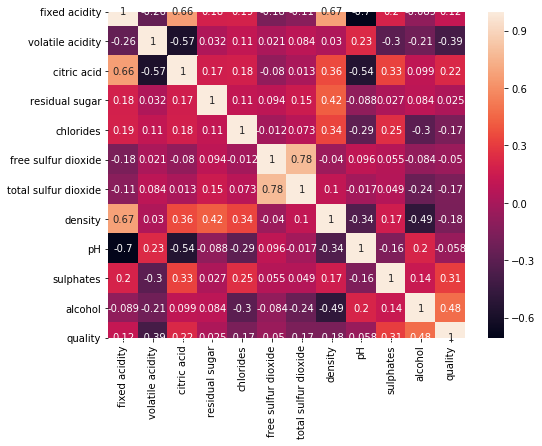

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(wine.corr(), annot=True)

In [55]:
# alcohol and sulphates have good correlation with quality but they are skewed

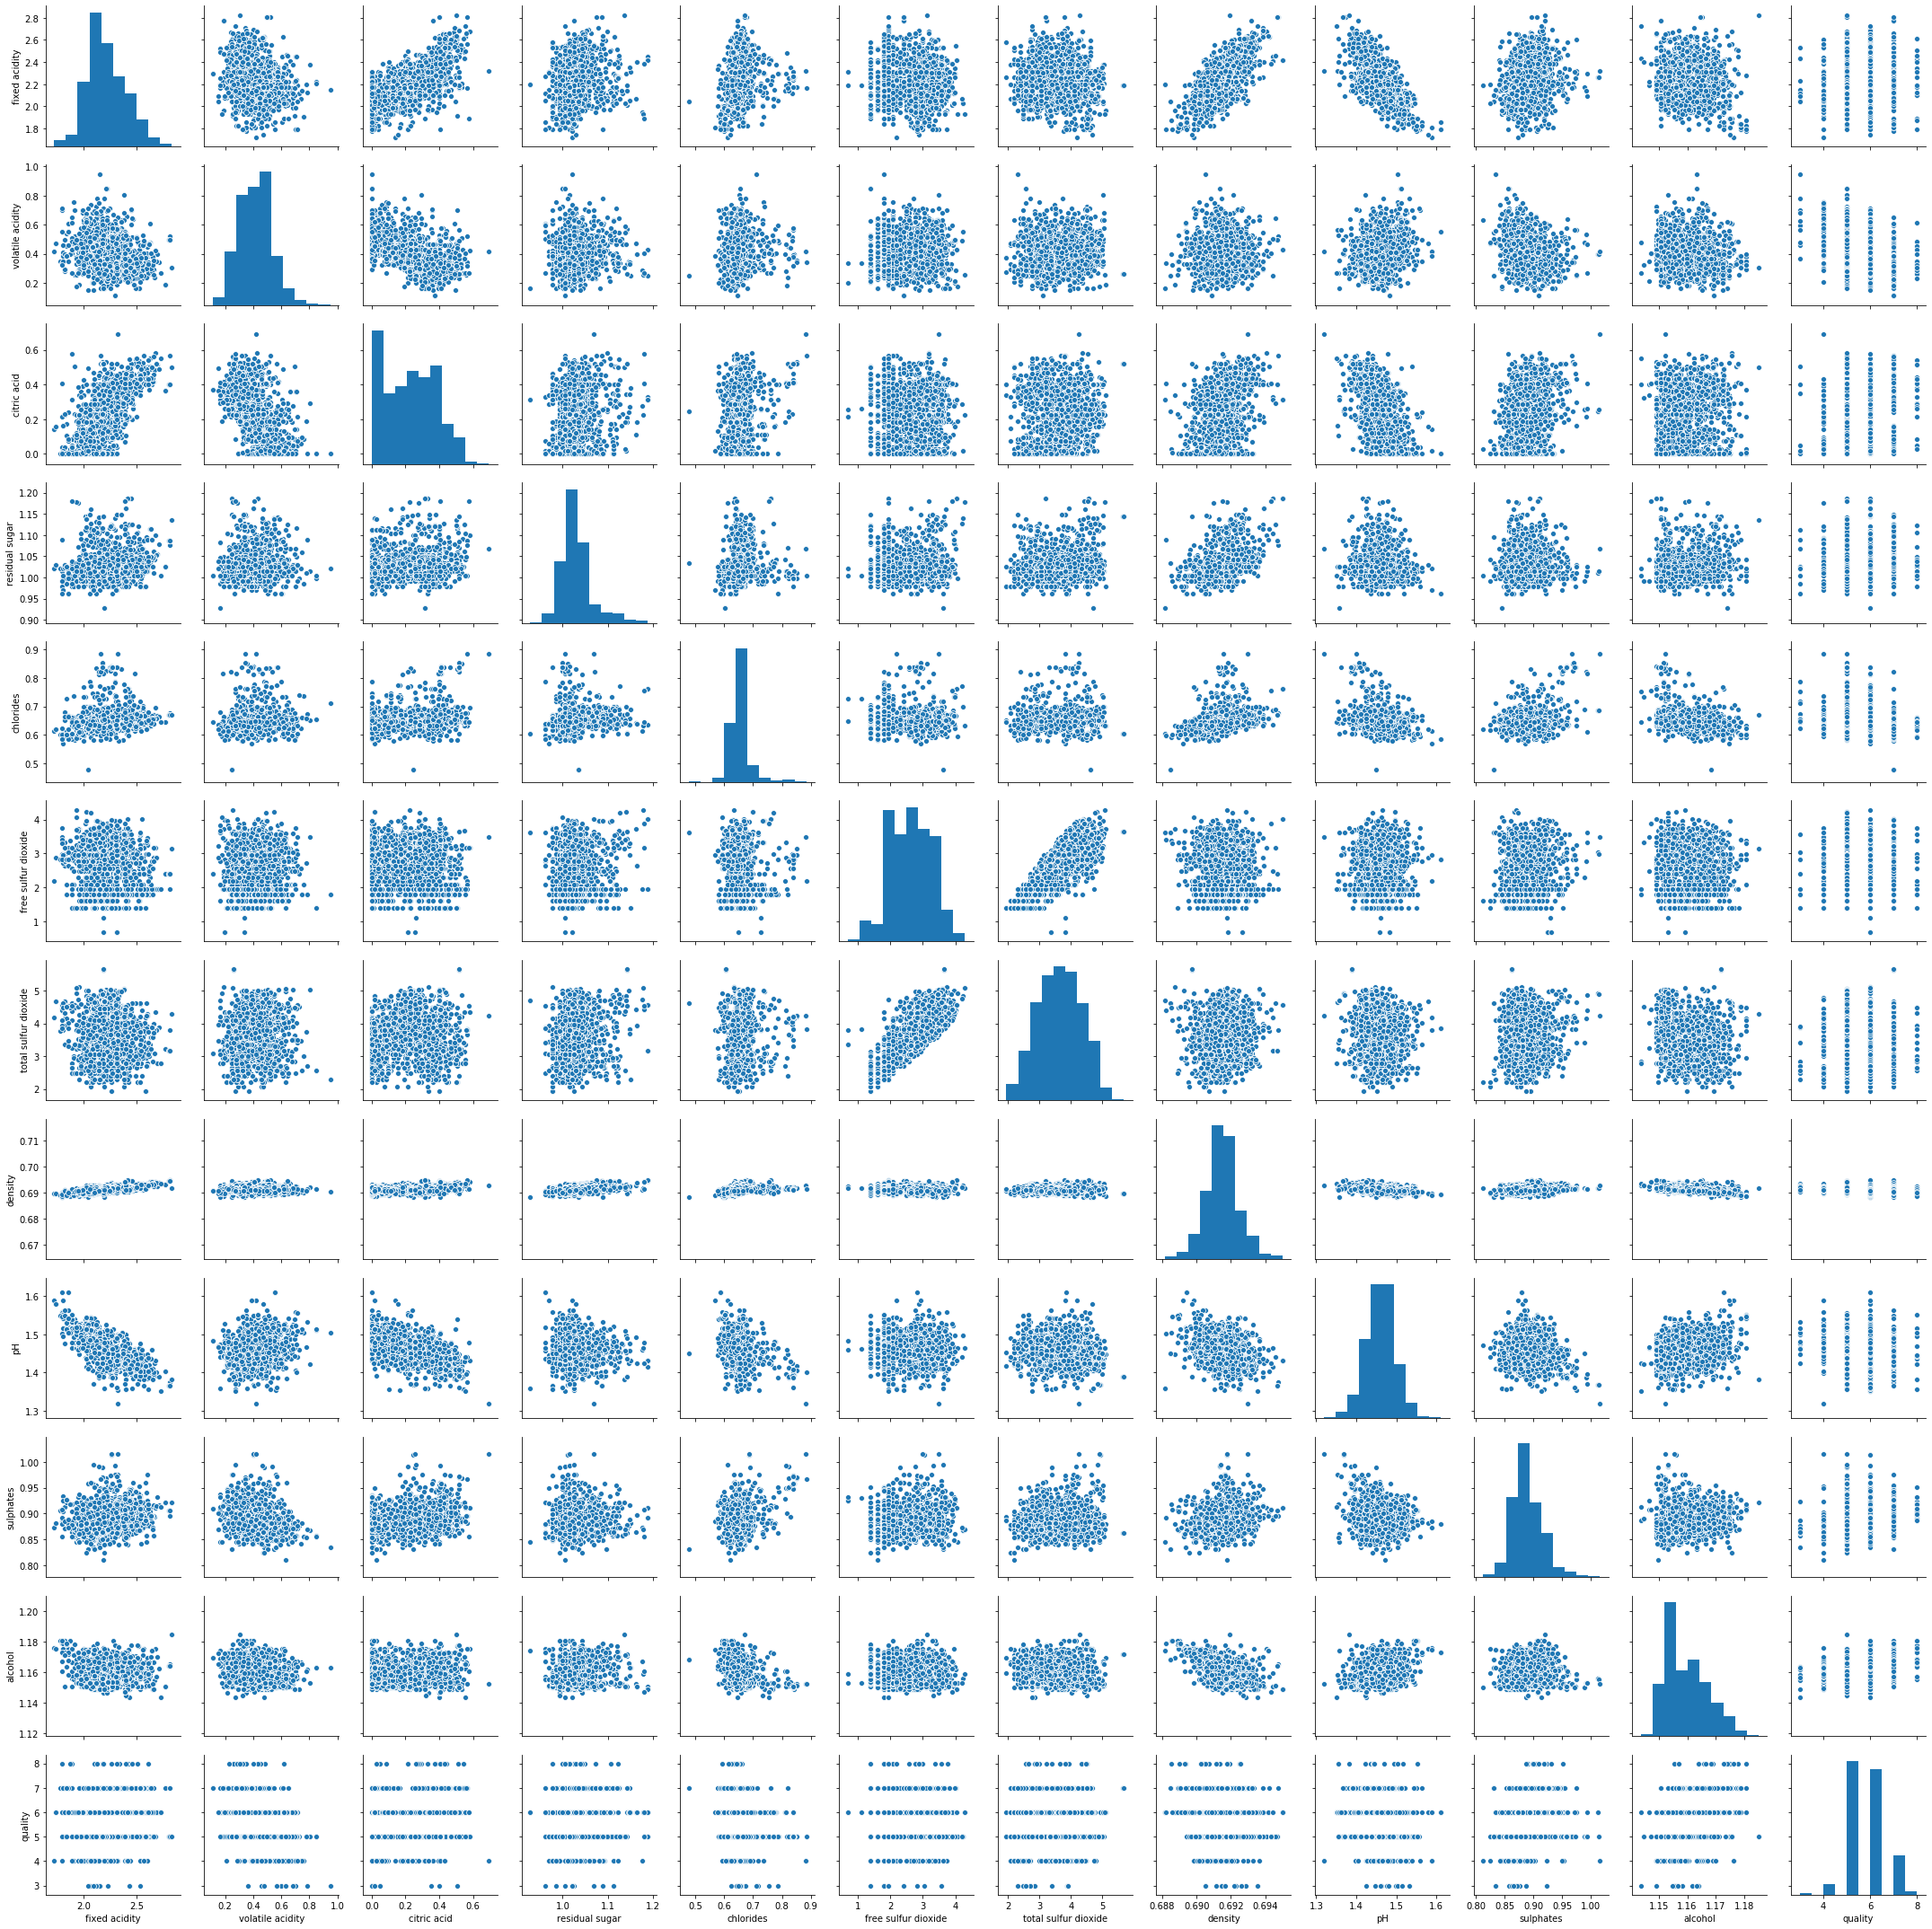

In [56]:
sns.pairplot(wine)

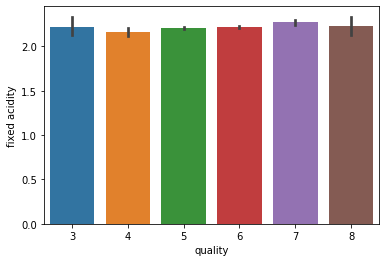

In [61]:
sns.barplot(data=wine, y='fixed acidity', x='quality')

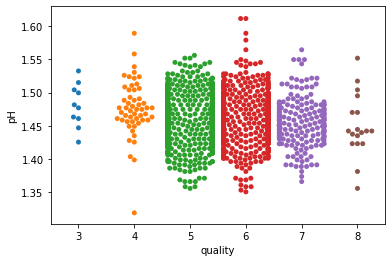

In [64]:
sns.swarmplot(data=wine, y='pH', x='quality')

In [65]:
# There are no missing values

# Outliers handling

In [66]:
from scipy.stats import zscore

In [67]:
z=np.abs(zscore(wine))

In [68]:
wine=wine[(z<3).all(axis=1)]

In [69]:
wine.shape

(1488, 12)

# Data Transformation

In [70]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.000000,1.010505,0.646847,2.484907,3.555348,0.692047,1.506297,0.873660,1.152370,5
1,2.174752,0.631272,0.000000,1.042128,0.673692,3.258097,4.219508,0.691546,1.435085,0.896394,1.155444,5
2,2.174752,0.565314,0.039221,1.029981,0.666944,2.772589,4.007333,0.691646,1.449269,0.891129,1.155444,5
3,2.501436,0.246860,0.444686,1.010505,0.645471,2.890372,4.110874,0.692147,1.425515,0.877782,1.155444,6
4,2.128232,0.530628,0.000000,1.010505,0.646847,2.484907,3.555348,0.692047,1.506297,0.873660,1.152370,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.974081,0.470004,0.076961,1.015798,0.664608,3.496508,3.806662,0.690594,1.492904,0.877782,1.160472,5
1595,1.931521,0.438255,0.095310,1.025509,0.625956,3.688879,3.951244,0.690704,1.508512,0.909316,1.165105,6
1596,1.987874,0.412110,0.122218,1.029981,0.646847,3.401197,3.713572,0.691015,1.486140,0.907782,1.163818,6
1597,1.931521,0.497740,0.113329,1.015798,0.645471,3.496508,3.806662,0.690880,1.519513,0.901420,1.158369,5


In [71]:
# Standard Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scx=StandardScaler()

In [74]:
x=wine.iloc[:, :-1]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.128232,0.530628,0.000000,1.010505,0.646847,2.484907,3.555348,0.692047,1.506297,0.873660,1.152370
1,2.174752,0.631272,0.000000,1.042128,0.673692,3.258097,4.219508,0.691546,1.435085,0.896394,1.155444
2,2.174752,0.565314,0.039221,1.029981,0.666944,2.772589,4.007333,0.691646,1.449269,0.891129,1.155444
3,2.501436,0.246860,0.444686,1.010505,0.645471,2.890372,4.110874,0.692147,1.425515,0.877782,1.155444
4,2.128232,0.530628,0.000000,1.010505,0.646847,2.484907,3.555348,0.692047,1.506297,0.873660,1.152370


In [75]:
y=wine.iloc[:,-1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [79]:
x=scx.fit_transform(x)
x=pd.DataFrame(x, columns=col[0:11])

In [80]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.500448,1.032569,-1.486689,-0.632590,-0.189009,-0.243074,-0.090520,0.626298,1.332903,-0.615638,-1.038911
1,-0.231998,1.938304,-1.486689,0.472886,0.937093,1.028491,0.901809,0.057396,-0.807157,0.365876,-0.597013
2,-0.231998,1.344719,-1.226267,0.048256,0.654038,0.230039,0.584796,0.171199,-0.380884,0.138549,-0.597013
3,1.653179,-1.521186,1.465977,-0.632590,-0.246720,0.423742,0.739498,0.740044,-1.094735,-0.437665,-0.597013
4,-0.500448,1.032569,-1.486689,-0.632590,-0.189009,-0.243074,-0.090520,0.626298,1.332903,-0.615638,-1.038911


# Model Selection

In [81]:
# the problem is classification with more than 2 classes

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [83]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=50)

In [85]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1190, 11)
(298, 11)
(1190,)
(298,)


In [91]:
models=[DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy'), SVC(kernel='rbf'),
       SVC(kernel='poly'), SVC(kernel='linear'), KNeighborsClassifier()]

In [92]:
for m in models:
    m.fit(x_train, y_train)
    pred=m.predict(x_test)
    print(accuracy_score(pred, y_test))

0.610738255033557
0.6006711409395973
0.62751677852349
0.6140939597315436
0.6040268456375839
0.6006711409395973


In [93]:
# the highest is svc(rbf)

In [94]:
# checking for an optimum value of random_state

In [98]:
maxsc=0
r_state=0
for i in range(20,170):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=i)
    svc=SVC(kernel='rbf')
    svc.fit(x_train, y_train)
    pred=svc.predict(x_test)
    acc=accuracy_score(pred, y_test)
    print(i, " ", acc)
    if acc > maxsc:
        maxsc=acc
        r_state=i
print(maxsc, " ", r_state)

20   0.6879194630872483
21   0.5671140939597316
22   0.6006711409395973
23   0.6241610738255033
24   0.587248322147651
25   0.6241610738255033
26   0.6476510067114094
27   0.6442953020134228
28   0.5939597315436241
29   0.6845637583892618
30   0.62751677852349
31   0.6342281879194631
32   0.5906040268456376
33   0.5973154362416108
34   0.5939597315436241
35   0.6342281879194631
36   0.6006711409395973
37   0.6543624161073825
38   0.6006711409395973
39   0.6543624161073825
40   0.6845637583892618
41   0.6476510067114094
42   0.674496644295302
43   0.6510067114093959
44   0.6342281879194631
45   0.587248322147651
46   0.6778523489932886
47   0.6006711409395973
48   0.6375838926174496
49   0.6140939597315436
50   0.62751677852349
51   0.5805369127516778
52   0.6040268456375839
53   0.610738255033557
54   0.6342281879194631
55   0.6040268456375839
56   0.6073825503355704
57   0.6409395973154363
58   0.6342281879194631
59   0.62751677852349
60   0.6577181208053692
61   0.6073825503355704
62

In [99]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=83)

In [100]:
for m in models:
    m.fit(x_train, y_train)
    pred=m.predict(x_test)
    print(accuracy_score(pred, y_test))

0.6308724832214765
0.6375838926174496
0.6912751677852349
0.6577181208053692
0.6342281879194631
0.62751677852349


In [101]:
# maximum is svc at 0.6912

In [126]:
maxsc=0
neigh=0
for i in range(3,55):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    acc=accuracy_score(pred,y_test)
#     print(i, " ", acc)
    if maxsc < acc:
        maxsc=acc
        neigh=i
print(neigh, " ", maxsc)

6   0.6543624161073825


In [105]:
from sklearn.model_selection import GridSearchCV

In [115]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x,y,test_size=0.20)
params={'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]}

In [124]:
g=GridSearchCV(KNeighborsClassifier(), params, scoring='accuracy')

In [125]:
g.fit(x_train, y_train)
g.best_params_

{'n_neighbors': 21}

In [123]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

# cross validation

In [104]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [127]:
maxsc=0
cfold=0
for i in range(5,200):
    score=cross_val_score(SVC(kernel='rbf'), x,y,cv=i)
    print(i, " ", score.mean(), " ", score.std())
    if maxsc < score.mean():
        maxsc=score.mean()
        cfold=i
print(cfold, " ", maxsc)

5   0.5766672943221092   0.04460073411156181
6   0.5849126896588409   0.04365212572419298
7   0.589569857539854   0.06691290617165653
8   0.5963873709341286   0.06486814423240177
9   0.5895320224278244   0.07457471430335652
10   0.595012100203392   0.06562102851650736
11   0.5986213067484661   0.07598516853509468
12   0.596585054012552   0.07637784763670842
13   0.5953578351449507   0.0751113324272729
14   0.5895926891742415   0.08447917740120221
15   0.5866473794980807   0.08683636623070991
16   0.599889956680276   0.08455391257780866
17   0.6063330036912239   0.07672738438271495
18   0.5976170117841737   0.08425785683561487
19   0.5960900996627181   0.08575137098136157
20   0.5971862032478369   0.09063309240034277
21   0.5971729059660953   0.08588034761344503
22   0.5987327206000008   0.088203976553239
23   0.590774420460383   0.09228221809738363
24   0.6025927773668521   0.08717502924206945
25   0.5973398279258714   0.08923131758949417
26   0.5965412345722414   0.09325721244995415
2

183   0.6285816794013515   0.19171425876160547
184   0.6290266798418972   0.1910188177562312
185   0.6309387309387309   0.19530518646844183
186   0.6310805830967121   0.19370608536224415
187   0.6306456466884275   0.19116772587220315
188   0.6299411286113414   0.19669785512856772
189   0.6285607396718508   0.18919782589768458
190   0.6287237031973875   0.19484996093874266
191   0.6326496075187175   0.1970071248279656
192   0.6293049543049543   0.19900625590014226
193   0.6303340585724005   0.1964860463539784
194   0.6310421966349801   0.18865077595363028
195   0.6336091686091685   0.19282574582168022
196   0.6298068145006921   0.19170091672148204
197   0.6298217856593491   0.19248171359245925
198   0.6276023219205037   0.19224520206360765
199   0.6264297678870542   0.19040059843081397
171   0.6343404808317089


In [129]:
pred=cross_val_predict(SVC(kernel='rbf'), x,y,cv=171)
print(accuracy_score(pred,y))

0.6229838709677419


In [130]:
x1=wine.iloc[:,0:-1]

In [131]:
y1=wine.iloc[:,-1]

In [132]:
x1_train, x1_test, y1_train, y1_test=train_test_split(x1,y1, test_size=0.2, random_state=83)

In [134]:
mnb=MultinomialNB()

In [135]:
mnb.fit(x1_train, y1_train)
pred=mnb.predict(x1_test)
print(accuracy_score(pred,y1_test))

0.5234899328859061


In [137]:
score=cross_val_score(mnb,x1,y1,cv=171)
print(score.mean(), score.std())
pred=cross_val_predict(mnb,x1,y1,cv=171)
print(accuracy_score(pred,y1))

0.46098115659519173 0.12042083572504916
0.4576612903225806


In [158]:
svc=SVC(kernel='rbf')
svc.fit(x1_train, y1_train)
pred=svc.predict(x1_test)
print(accuracy_score(y_test,pred))

0.5469798657718121


# Ensemble

In [138]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [139]:
params={'n_estimators':[i for i in range(10,200,10)]}

In [140]:
g=GridSearchCV(RandomForestClassifier(), params)

In [141]:
g.fit(x_train, y_train)
g.best_params_

{'n_estimators': 90}

In [167]:
rf=RandomForestClassifier(n_estimators=90)

In [168]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
pred=rf.predict(x_test)
print(accuracy_score(y_test, pred))

0.7315436241610739


In [170]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.76      0.81      0.78       135
           6       0.70      0.76      0.73       119
           7       0.73      0.58      0.64        33
           8       0.00      0.00      0.00         2

    accuracy                           0.73       298
   macro avg       0.44      0.43      0.43       298
weighted avg       0.70      0.73      0.72       298

[[  0   7   2   0   0]
 [  0 109  25   1   0]
 [  0  24  90   5   0]
 [  0   3  11  19   0]
 [  0   0   1   1   0]]


In [146]:
score=cross_val_score(RandomForestClassifier(n_estimators=90), x,y,cv=171)
print(score.mean(), " ", score.std())

0.6749094959621275   0.16916934794332047


In [147]:
g=GridSearchCV(AdaBoostClassifier(), params)

In [148]:
g.fit(x_train, y_train)
g.best_params_

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 20}

In [151]:
abc=AdaBoostClassifier(n_estimators=20, base_estimator=SVC(kernel='rbf'), algorithm='SAMME')

In [152]:
abc.fit(x_train, y_train)
pred=abc.predict(x_test)
print(accuracy_score(y_test, pred))

0.45302013422818793


In [156]:
abc=AdaBoostClassifier(n_estimators=70)
abc.fit(x_train, y_train)
pred=abc.predict(x_test)
print(accuracy_score(y_test, pred))

0.3825503355704698


In [159]:
for i in range(10,100,10):
    gbc=GradientBoostingClassifier(n_estimators=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    print(accuracy_score(y_test,pred))

0.6342281879194631
0.6644295302013423
0.6644295302013423
0.6812080536912751
0.6812080536912751
0.6778523489932886
0.6912751677852349
0.6946308724832215
0.697986577181208


In [160]:
# the best model is random forest classifier

# Auc_roc

In [164]:
from sklearn.metrics import roc_curve, roc_auc_score

In [166]:
# AUC_ROC curve is defined only for 2 classes

# Saving the model

In [161]:
import joblib

In [162]:
joblib.dump(rf, 'rf_wine.pkl')

['rf_wine.pkl']